In [124]:
#Wholesale modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Specific Methods
from sklearn.naive_bayes import BernoulliNB
from IPython.display import display as dsp

In [133]:
def print_file(path, num):
    i = 0
    while i < num:
        for line in open(path):
            print(line)
            i += 1        
            
def parsefile(path, head = False):
    df = pd.read_csv(path, delimiter = '\t', header = None)
    df.rename(columns = {0: 'Review', 1:'Positive'}, inplace = True)
    df['Positive'] = (df['Positive'] == 1)
    if head == True:
        dsp(df.head())
    
    return df

def keyword_columnate(df, keywords):
    for key in keywords:
        df[str(key)] = df['Review'].str.contains(str(key), case = False) 
        
def bern_fit_test(df, keywords):
    data = df[keywords]
    target = df['Positive']

    #Bernoulli Naive Bayes Classifier
    bnb = BernoulliNB()
    bnb.fit(data, target)
    y_pred = bnb.predict(data)


    print("Number of mislabeled points out of a total {} points : {}".format(
        data.shape[0],
        (target != y_pred).sum()
    ))
    
def print_reviews(df):
    for entry in df['Review']:
        print(entry)

In [135]:
#Lets have some samples of reviews and their classification
#print_reviews(df)

In [127]:
df = parsefile('data/yelp_labelled.txt', head = True)

,Review,Positive
0,Wow... Loved this place.,True
1,Crust is not good.,False
2,Not tasty and the texture was just nasty.,False
3,Stopped by during the late May bank holiday of...,True
4,The selection on the menu was great and so wer...,True


In [128]:
keywords = ['great','good', 'bad', 'not good', 'awful', 'service', 'fast', 'dissapointing'
            'slow', 'tasty', 'food', 'do not', 'love','terrible']
#keywords = ['great','good', 'service', 'fast', 'tasty', 'food', 'love']

keyword_columnate(df, keywords)
df.head()

,Review,Positive,great,good,bad,not good,awful,service,fast,slow,tasty,food,do not,love,terrible
0,Wow... Loved this place.,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,Crust is not good.,False,False,True,False,True,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,False,False,False,False,False,False,False,False,False,False,False,True,False
4,The selection on the menu was great and so wer...,True,True,False,False,False,False,False,False,False,False,False,False,False,False


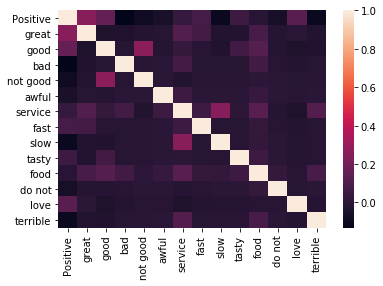

In [129]:
sns.heatmap(df.corr())
plt.show()

In [130]:
bern_fit_test(df, keywords)

Number of mislabeled points out of a total 1000 points : 355
